<a href="https://colab.research.google.com/github/adarshjha01/Buying-Behaviour-Prediction/blob/main/BA_Customer_buying_behaviour_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [ ]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/data/Customer Booking Data.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [10]:
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


# Data Visualisation

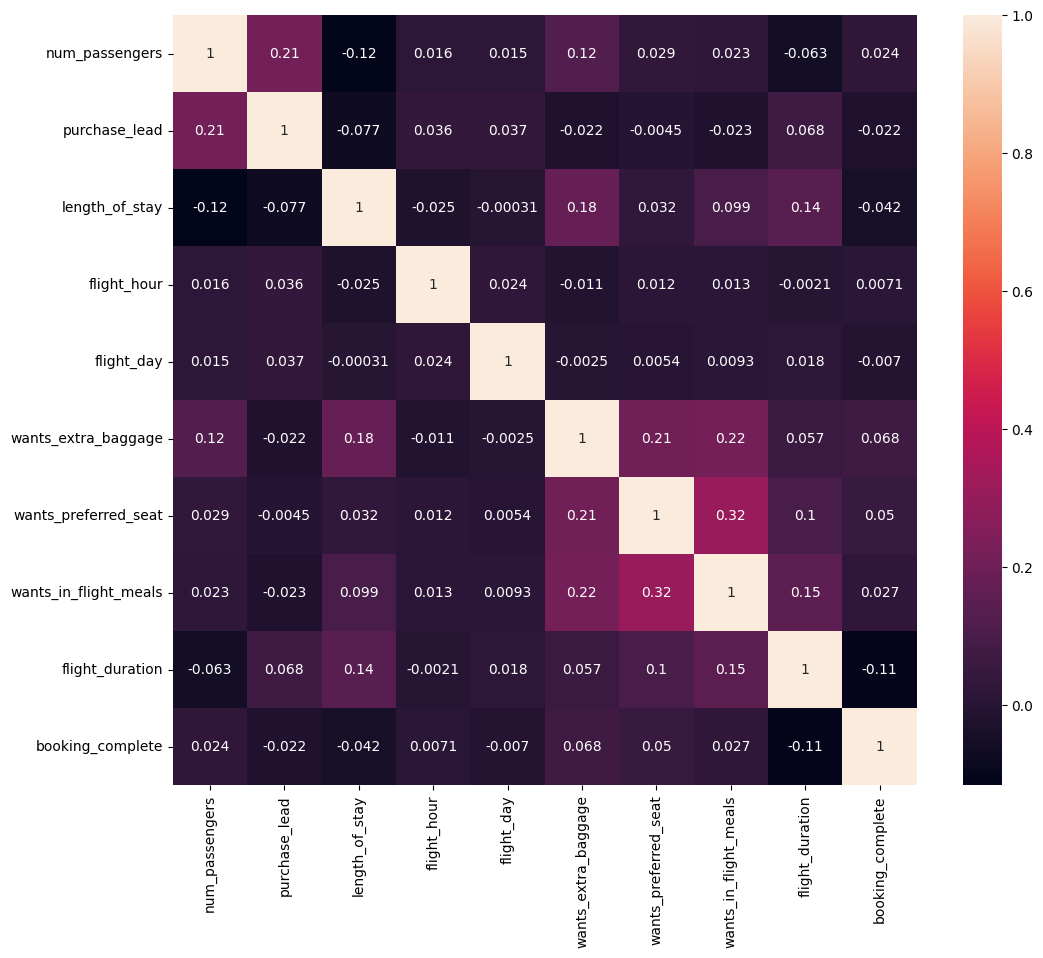

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
corr_matrix = numerical_df.corr()

# Increase figure size for larger boxes
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
# List of categorical columns to encode
categorical_columns = ["sales_channel", "trip_type", "flight_day", "route", "booking_origin"]

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [21]:
print(df.head())  # View the transformed DataFrame
print(df.info())  # Confirm the new column structure

   num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  sales_channel_Mobile  ...  \
0             5.52                 0                 False  ...   
1             5.52                 0            

# Feature Engineering

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numeric columns to scale
numeric_columns = ["num_passengers", "purchase_lead", "length_of_stay", "flight_hour", "flight_duration"]

# Apply scaling
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

Splitting the dataset

In [24]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop("booking_complete", axis=1)  # Drop the target column
y = df["booking_complete"]  # Target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training a Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluating Accuracy of the model

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Precision: 0.53
Recall: 0.13
Confusion Matrix:
[[8355  165]
 [1293  187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.13      0.20      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



# Feature Importance Visualization

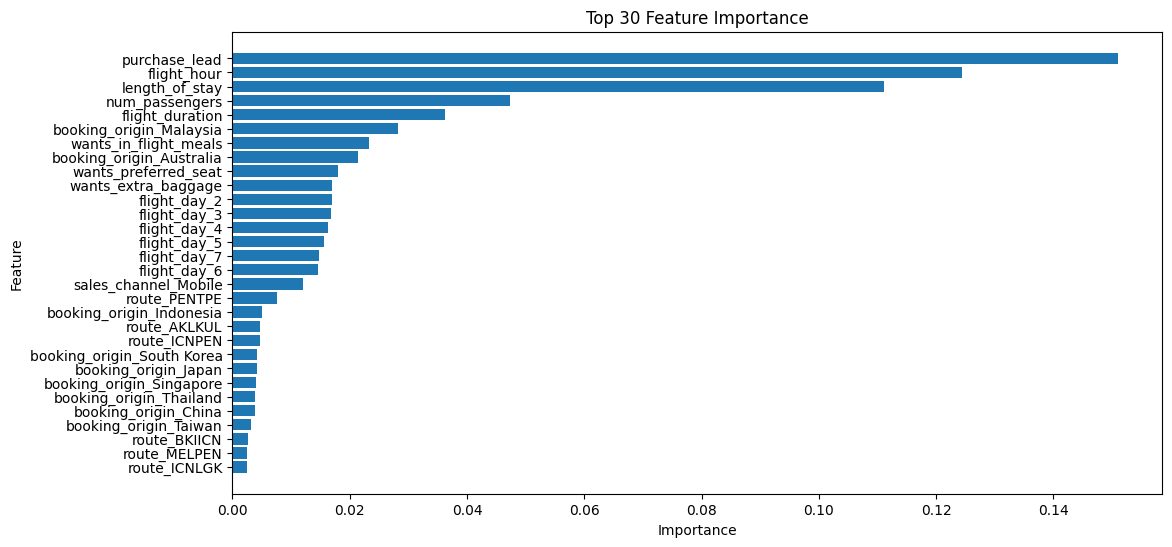

In [40]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances}).sort_values(by="Importance", ascending=False)

# Select top N features (e.g., top 10)
N = 30  # You can adjust this value
top_features = importance_df.head(N)

# Plot feature importances for top features
plt.figure(figsize=(12, 6))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.title("Top {} Feature Importance".format(N))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Flip y-axis for readability
plt.show()

*These are the features that customer will keep in his mind while booking a flight with British Airways*

918
